In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from tensorflow.keras.applications.vgg19 import VGG19
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import Xception

In [ ]:
datagen = ImageDataGenerator(
    rescale = 1./255, 
    # rotation_range = 5,
    # zoom_range = (0.90, 0.90),
    # brightness_range = (0.95, 0.95),
    # horizontal_flip = True,
    # vertical_flip = True,
    data_format = 'channels_last',
    validation_split = 0.2,
    dtype = tf.bfloat16
)

train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/AlzheimersDataset/train',
    target_size = (224, 224),
    batch_size = (32),
    class_mode = 'categorical',
    shuffle = True,
    subset = 'training',
    seed = 123
)

validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/AlzheimersDataset/train',
    target_size = (224, 224),
    batch_size = (32),
    class_mode = 'categorical',
    shuffle = True,
    subset = 'validation',
    seed = 123
)

Found 4098 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.


In [ ]:
datagen2 = ImageDataGenerator(
    rescale = 1./255, 
    rotation_range = 5,
    zoom_range = (0.90, 0.90),
    brightness_range = (0.95, 0.95),
    horizontal_flip = True,
    vertical_flip = True,
    data_format = 'channels_last',
    validation_split = 0.0,
    dtype = float
)

test_generator = datagen2.flow_from_directory(
    '/content/drive/MyDrive/AlzheimersDataset/test',
    target_size = (224, 224),
    batch_size = (4),
    class_mode = 'categorical',
    shuffle = True,
    subset = 'training',
    seed = 123
)

Found 1279 images belonging to 4 classes.


In [ ]:
base_model = Xception(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [ ]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [ ]:
model.layers

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['AUC', 'accuracy', 'Recall', 'Precision'])

In [ ]:
es = EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=100, callbacks=[es])

Epoch 1/100
129/129 [==============================] - 1196s 9s/step - loss: 3.7726 - auc: 0.7684 - accuracy: 0.5571 - recall: 0.5500 - precision: 0.5638 - val_loss: 2.0995 - val_auc: 0.7434 - val_accuracy: 0.4868 - val_recall: 0.4721 - val_precision: 0.4964
Epoch 2/100
129/129 [==============================] - 13s 104ms/step - loss: 1.3232 - auc: 0.8735 - accuracy: 0.6828 - recall: 0.6747 - precision: 0.6909 - val_loss: 2.6694 - val_auc: 0.7219 - val_accuracy: 0.4829 - val_recall: 0.4761 - val_precision: 0.4914
Epoch 3/100
129/129 [==============================] - 13s 102ms/step - loss: 0.9780 - auc: 0.9192 - accuracy: 0.7650 - recall: 0.7567 - precision: 0.7718 - val_loss: 1.8532 - val_auc: 0.8037 - val_accuracy: 0.5601 - val_recall: 0.5464 - val_precision: 0.5646
Epoch 4/100
129/129 [==============================] - 13s 102ms/step - loss: 0.4284 - auc: 0.9707 - accuracy: 0.8492 - recall: 0.8448 - precision: 0.8565 - val_loss: 1.8077 - val_auc: 0.7909 - val_accuracy: 0.5464 - val_

In [ ]:
model.evaluate(validation_generator)

32/32 [==============================] - 3s 80ms/step - loss: 1.5315 - auc: 0.8455 - accuracy: 0.6129 - recall: 0.6041 - precision: 0.6236


[1.5315141677856445,
 0.8455051183700562,
 0.6129032373428345,
 0.6041055917739868,
 0.6236125230789185]

In [ ]:
y_pred = model.predict(validation_generator)

In [ ]:
validation_generator.classes

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [ ]:
confusion_matrix(validation_generator.classes, np.argmax(y_pred, axis=1))

NameError: ignored

In [ ]:
print(classification_report(validation_generator.classes, np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.15      0.13      0.14       143
           1       0.00      0.00      0.00        10
           2       0.50      0.55      0.52       512
           3       0.38      0.34      0.36       358

    accuracy                           0.41      1023
   macro avg       0.26      0.26      0.26      1023
weighted avg       0.40      0.41      0.41      1023



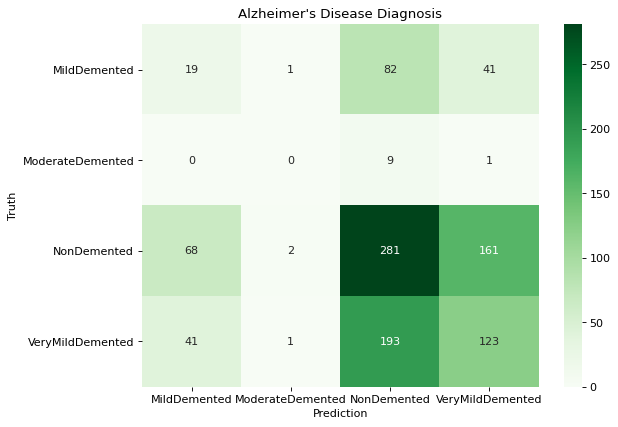

In [ ]:
CLASSES = [ 'MildDemented',
            'ModerateDemented',
            'NonDemented',
            'VeryMildDemented']

conf_arr = confusion_matrix(validation_generator.classes, np.argmax(y_pred, axis=-1))

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels=CLASSES, yticklabels=CLASSES)

plt.title('Alzheimer\'s Disease Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)